In [1]:
import numpy as np
import scipy.stats as stats
import pylab as plt 
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import MeanShift
import pandas

In [2]:
import requests

# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names = np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

/tmp/ipykernel_11147/3973052632.py:9: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')


In [3]:
#To convert the columns to float when possible
def convertor(dataframe):
    for col in dataframe.columns:
        try:
            dataframe[col] = dataframe[col].astype(float)
        except ValueError:
            pass
    return dataframe

In [4]:
#Prepare the DataFrame
df_data=pandas.DataFrame(data.T, columns=names) # "-999" are the unknown data
df_data.replace("-999", np.nan, inplace=True)
df_data = convertor(df_data)


In [5]:
df_data

,GRB_name,GRB_name_Fermi,T0,ra,decl,pos_error,T90,T90_error,T90_start,fluence,fluence_error,redshift,'T100',GBM_located,mjd_(T0)
0,GRB251001B,None,14:17:19,42.6509,-23.0205,0.000272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,60949.595359
1,GRB251001A,GRB251001112,2:40:56,224.4400,-56.2300,2.912733,7.040,0.265,2:40:56.888,4.847600e-06,1.609600e-08,NaN,7.928,True,60949.111759
2,GRB250929A,GRB250929838,20:06:03.850,58.1700,-60.1800,7.513365,9.728,2.919,20:06:03.850,5.151600e-07,2.026100e-08,NaN,9.728,True,60947.837545
3,GRB250926B*,GRB250926827,19:50:28.861,13.6400,-86.1800,5.170463,24.256,1.619,19:50:28.861,3.655200e-06,3.116900e-08,NaN,24.256,True,60944.826723
4,GRB250926A,GRB250926015,0:21:23,82.9800,-7.0200,2.698394,2.432,0.202,0:21:24.030,3.699400e-06,2.343000e-08,NaN,3.462,True,60944.014850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,GRB910425B*,None,5:33:13.716,335.9500,25.7667,4.790000,430.016,1.094,5:33:13.716,1.351000e-06,6.342900e-08,NaN,430.016,False,48371.231409
8882,GRB910425A*,None,0:37:45.700,91.3000,-22.7667,1.020000,90.176,0.286,0:37:49.924,1.327700e-05,6.867400e-08,NaN,94.400,False,48371.026223
8883,GRB910424A*,None,19:43:25.064,201.3000,-45.4167,13.780000,3.136,0.590,19:43:25.064,2.485800e-08,1.049600e-08,NaN,3.136,False,48370.821818
8884,GRB910423A*,None,19:51:15.804,193.4750,-8.3833,11.100000,208.576,1.118,19:51:15.804,1.651000e-07,1.701500e-08,NaN,208.576,False,48369.827266


In [6]:
#Do this to prepare tha data for machine learning
df_data['T90'].values[:, np.newaxis]
#df_data['T90'].dropna().values[:, np.newaxis] #Pull out the NaN values

array([[    nan],
       [  7.04 ],
       [  9.728],
       ...,
       [  3.136],
       [208.576],
       [  5.184]], shape=(8886, 1))

Cluster centers: [ 29.96683163 280.5978526 ]
Labels: [0 0 0 ... 0 1 0]


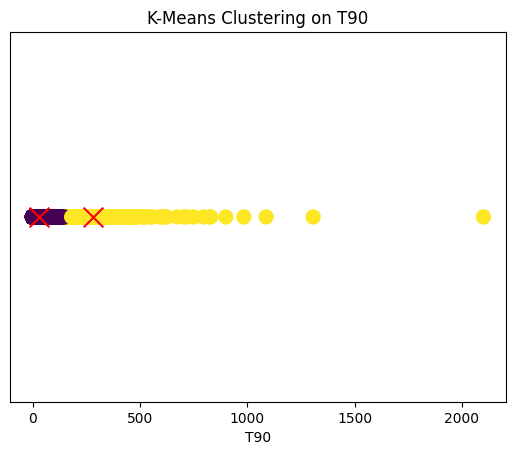

In [7]:
#KMeans 
#from sklearn.preprocessing import StandardScaler

tdata = df_data['T90'].dropna().values[:, np.newaxis] #Pull out the NaN values
#tdata = preprocessing.StandardScaler().fit_transform(tdata)
 
#Choose the number of clusters 
k = 2
 
#Apply K-Means 
kmeans = KMeans(n_clusters=k, random_state=42) 
kmeans.fit(tdata) 
 
#Analyse the results 
centers = kmeans.cluster_centers_ 
labels = kmeans.labels_ 
 
#Print results 
print("Cluster centers:", centers.flatten()) 
print("Labels:", labels) 
 
#Visualise the 1D clustering 
plt.scatter(tdata, np.zeros_like(tdata), c=labels, s=100) 
plt.scatter(centers, np.zeros_like(centers), c='red', marker='x', s=200) 
plt.title('K-Means Clustering on T90') 
plt.xlabel('T90') 
plt.yticks([])
plt.show() 

Let's try to perform the analysis including also the fluence

Cluster centers (scaled): [[-0.15938931 -0.01726891]
 [ 3.27944624  0.35530913]]
Labels: [0 0 0 ... 0 1 0]


/tmp/ipykernel_11147/544009233.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


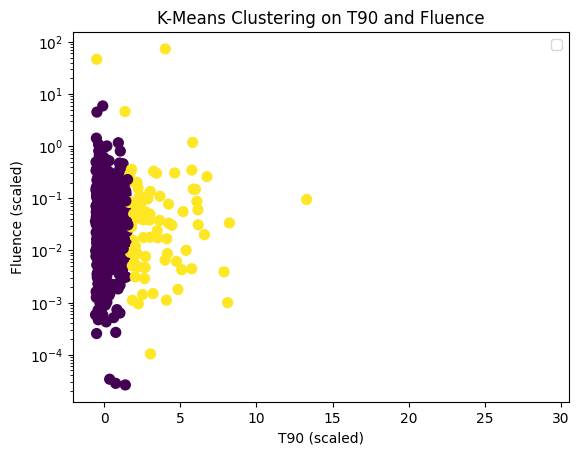

In [12]:
#KMeans considering T90 and fluence
from sklearn.preprocessing import StandardScaler


X = df_data[['T90', 'fluence']].dropna().values
X_scaled = StandardScaler().fit_transform(X) #Standardise the features

#Apply K-Means
#2 clusters because we want to see if we can identify short and long GRBs

kmeans = KMeans(n_clusters=2, random_state= 42)
labels = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_
print("Cluster centers (scaled):", centers)
print("Labels:", labels)

#Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering on T90 and Fluence')
plt.xlabel('T90 (scaled)')
plt.ylabel('Fluence (scaled)')
plt.yscale('log') ###
plt.legend()
plt.show()

Cluster centers (scaled): [[-2.46355416e-01 -2.06554308e-02]
 [ 7.39007292e+00  1.25719792e-02]
 [ 9.03162415e+00 -1.17696809e-02]
 [ 1.12379005e+01 -2.30715562e-02]
 [ 1.27018377e+01  3.18063379e-02]
 [-2.85126496e-01  5.20378535e+00]
 [ 2.90292545e+01 -2.90084663e-02]
 [ 1.47598718e+01 -2.83858471e-02]
 [ 4.01315137e+00  7.32408782e+01]
 [ 1.36811261e+00  4.61314612e+00]
 [-4.90883379e-01  4.63890092e+01]]
Labels: [ 0  0  0 ...  0 -1  0]


/tmp/ipykernel_11147/877703225.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


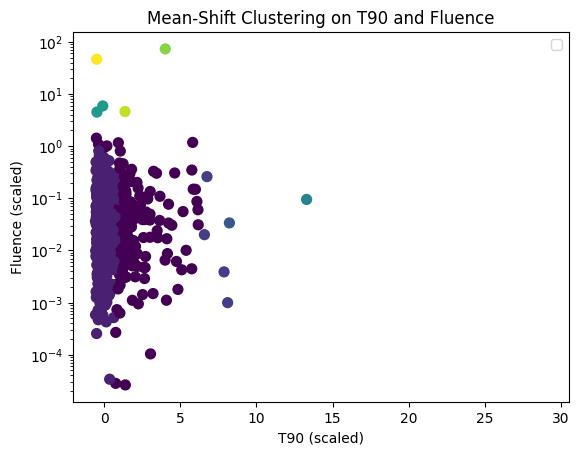

In [13]:
#Mean-shift considering T90 and fluence

ms = MeanShift(bandwidth=1, 
               bin_seeding=True, 
               cluster_all=False)
labels = ms.fit_predict(X_scaled)
centers = ms.cluster_centers_
print("Cluster centers (scaled):", centers)
print("Labels:", labels)
#Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Mean-Shift Clustering on T90 and Fluence')
plt.xlabel('T90 (scaled)')
plt.ylabel('Fluence (scaled)')
plt.legend()
plt.yscale('log') ###
plt.show()

Outliers disturbe the Mean-Shift algorithm